In [2]:
import urllib.request  as urllib2
from newspaper import Article
import csv
import pandas as pd
import socket
#url = 'https://techcrunch.com/2014/03/10/ebay-asks-shareholders-to-vote-against-paypal-split-while-icahn-claims-ceo-incompetence-cost-4b/'

In [214]:
"""#reader = csv.reader('newsCorpora.csv', delimiter='\t')
reader = pd.read_csv('newsCorpora.csv', delimiter='\t', header=None)
reader.drop([0,5,6,7], axis =1, inplace = True)
reader.columns = ['Title', 'Text','Page','Category']
#reader2 = reader.head(500)
reader.head()"""

"#reader = csv.reader('newsCorpora.csv', delimiter='\t')\nreader = pd.read_csv('newsCorpora.csv', delimiter='\t', header=None)\nreader.drop([0,5,6,7], axis =1, inplace = True)\nreader.columns = ['Title', 'Text','Page','Category']\n#reader2 = reader.head(500)\nreader.head()"

In [77]:
"""# converts unicode value to corresponding ASCII value, not extensive!
def unicodetoascii(text):
    print("entering inside")

    TEXT = (text.
            replace('\xe2\x80\x99', "'").
            replace('\xc3\xa9', 'e').
            replace('\xe2\x80\x90', '-').
            replace('\xe2\x80\x91', '-').
            replace('\xe2\x80\x92', '-').
            replace('\xe2\x80\x93', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x98', "'").
            replace('\xe2\x80\x9b', "'").
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9d', '"').
            replace('\xe2\x80\x9e', '"').
            replace('\xe2\x80\x9f', '"').
            replace('\xe2\x80\xa6', '...').
            replace('\xe2\x80\xb2', "'").
            replace('\xe2\x80\xb3', "'").
            replace('\xe2\x80\xb4', "'").
            replace('\xe2\x80\xb5', "'").
            replace('\xe2\x80\xb6', "'").
            replace('\xe2\x80\xb7', "'").
            replace('\xe2\x81\xba', "+").
            replace('\xe2\x81\xbb', "-").
            replace('\xe2\x81\xbc', "=").
            replace('\xe2\x81\xbd', "(").
            replace('\xe2\x81\xbe', ")").
            replace('\n', " ").
            replace('\'', "'"))
    
    return TEXT"""

In [213]:
"""count_accepted = 0
timeout = 10
with open("output.csv", "w", newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for index, row in reader.iterrows():
        url = row['Text'].strip()
        #title = row['Title']
        
        #print("url is ",row['Text'])
        if((index>=65628) & (row['Category'] == 'm')):
        
            try:
                #print("url ",url)

                socket.setdefaulttimeout(timeout)
                urllib2.urlopen(url)
                #print("pass1")
                article = Article(url)
                #print("pass2")
                article.download()
                #print("pass3")
                article.parse()
                #print('pass4')
                article_text = unicodetoascii(article.text)
                #print("pass5")
                title = row['Title']
                #print("pass6")
                category = row['Category']
                #print("pass7")
                count_accepted = count_accepted+1

                wr.writerow([title, article_text, category])
                print(count_accepted)
                #print("pass4")
            except Exception as e:
                print("ignoring")
        #print("---------------------------------")
print(count_accepted)"""

'count_accepted = 0\ntimeout = 10\nwith open("output.csv", "w", newline=\'\') as myfile:\n    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)\n    for index, row in reader.iterrows():\n        url = row[\'Text\'].strip()\n        #title = row[\'Title\']\n        \n        #print("url is ",row[\'Text\'])\n        if((index>=65628) & (row[\'Category\'] == \'m\')):\n        \n            try:\n                #print("url ",url)\n\n                socket.setdefaulttimeout(timeout)\n                urllib2.urlopen(url)\n                #print("pass1")\n                article = Article(url)\n                #print("pass2")\n                article.download()\n                #print("pass3")\n                article.parse()\n                #print(\'pass4\')\n                article_text = unicodetoascii(article.text)\n                #print("pass5")\n                title = row[\'Title\']\n                #print("pass6")\n                category = row[\'Category\']\n                #print("

In [181]:
df = pd.read_csv('output2.csv')
df.dropna(inplace=True)
#df.columns = ['Title', 'text','Category']
df['text'] = df[['Title', 'Text']].apply(lambda x: ' '.join(x), axis=1)
df.head()

,Title,Text,Category,text
0,Fed's Charles Plosser sees high bar for change...,Paris/London/Atlanta: Federal Reserve Bank of ...,b,Fed's Charles Plosser sees high bar for change...
1,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Severe winter weather likely affected U.S. job...,b,Fed's Plosser: Nasty Weather Has Curbed Job Gr...
2,Plosser: Fed May Have to Accelerate Tapering Pace,Entrepreneurship is about being a bulldog but ...,b,Plosser: Fed May Have to Accelerate Tapering P...
3,Fed's Plosser: Taper pace may be too slow,PARISn — The Federal Reserve may have to accel...,b,Fed's Plosser: Taper pace may be too slow PARI...
4,Fed's Plosser expects US unemployment to fall ...,FXStreet (Łódź) - Philadelphia Fed President C...,b,Fed's Plosser expects US unemployment to fall ...


In [182]:
len(df)

21774

In [183]:
df['Count'] = df['text'].str.split().apply(len)
df.head()

,Title,Text,Category,text,Count
0,Fed's Charles Plosser sees high bar for change...,Paris/London/Atlanta: Federal Reserve Bank of ...,b,Fed's Charles Plosser sees high bar for change...,436
1,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Severe winter weather likely affected U.S. job...,b,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,214
2,Plosser: Fed May Have to Accelerate Tapering Pace,Entrepreneurship is about being a bulldog but ...,b,Plosser: Fed May Have to Accelerate Tapering P...,19
3,Fed's Plosser: Taper pace may be too slow,PARISn — The Federal Reserve may have to accel...,b,Fed's Plosser: Taper pace may be too slow PARI...,302
4,Fed's Plosser expects US unemployment to fall ...,FXStreet (Łódź) - Philadelphia Fed President C...,b,Fed's Plosser expects US unemployment to fall ...,143


In [184]:
df_sub = df[~ (df['Count'] < 50)]
len(df_sub)

19340

In [185]:
df_sub_dum = pd.get_dummies(df_sub['Category'])
dataset = pd.concat([df_sub, df_sub_dum], axis=1)
dataset.head()

,Title,Text,Category,text,Count,b,e,m,t
0,Fed's Charles Plosser sees high bar for change...,Paris/London/Atlanta: Federal Reserve Bank of ...,b,Fed's Charles Plosser sees high bar for change...,436,1,0,0,0
1,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Severe winter weather likely affected U.S. job...,b,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,214,1,0,0,0
3,Fed's Plosser: Taper pace may be too slow,PARISn — The Federal Reserve may have to accel...,b,Fed's Plosser: Taper pace may be too slow PARI...,302,1,0,0,0
4,Fed's Plosser expects US unemployment to fall ...,FXStreet (Łódź) - Philadelphia Fed President C...,b,Fed's Plosser expects US unemployment to fall ...,143,1,0,0,0
5,ECB unlikely to end sterilisation of SMP purch...,The best investment choice and insight around ...,b,ECB unlikely to end sterilisation of SMP purch...,206,1,0,0,0


In [186]:
dataset['Category'].value_counts() 

e    5837
b    4728
m    4507
t    4268
Name: Category, dtype: int64

In [187]:
dataset.drop(['Title','Count'], axis =1, inplace = True)
dataset.head()

,Text,Category,text,b,e,m,t
0,Paris/London/Atlanta: Federal Reserve Bank of ...,b,Fed's Charles Plosser sees high bar for change...,1,0,0,0
1,Severe winter weather likely affected U.S. job...,b,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,1,0,0,0
3,PARISn — The Federal Reserve may have to accel...,b,Fed's Plosser: Taper pace may be too slow PARI...,1,0,0,0
4,FXStreet (Łódź) - Philadelphia Fed President C...,b,Fed's Plosser expects US unemployment to fall ...,1,0,0,0
5,The best investment choice and insight around ...,b,ECB unlikely to end sterilisation of SMP purch...,1,0,0,0


In [188]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Text,Category,text,b,e,m,t
0,An employee hugs an elephant at the Arlette Gr...,t,"Elephants can gauge threat from human voices, ...",0,0,0,1
1,* Citigroup shares slump after Fed rejects cap...,b,US STOCKS-Wall St dips after data; Citi leads ...,1,0,0,0
2,The Medicare reimbursement data released this ...,m,Editorial: Throwing a light on Medicare billin...,0,0,1,0
3,The availability of free medication samples in...,m,Free drug samples can change prescribing habit...,0,0,1,0
4,"A new study, published in Alcoholism: Clinical...",m,New research explains why binge drinking prolo...,0,0,1,0


In [189]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn
import nltk
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
trans_table = {ord(c): None for c in string.punctuation + string.digits}    
stemmer = PorterStemmer()
#dataset = pd.read_csv('articles.csv')
def tokenize(text):
        # my text was unicode so I had to use the unicode-specific translate function. If your documents are strings, you will need to use a different `translate` function here. `Translated` here just does search-replace. See the trans_table: any matching character in the set is replaced with `None`
        tokens = [word for word in nltk.word_tokenize(text.translate(trans_table)) if len(word) > 1] #if len(word) > 1 because I only want to retain words that are at least two characters before stemming, although I can't think of any such words that are not also stopwords
        stems = [stemmer.stem(item) for item in tokens]
        return stems
docs = []
df_docs = dataset[dataset['text'].notnull()]
"""for row_val in df_docs['body']:
    val = str(row_val).split(',')
    docs.append(''.join(val))
    """
print(len(df_docs))
#df_docs['text'] = df_docs['text'].str.replace('\n',' ')

data = dataset['text']
print(data.head())
print(len(data))

tf_idf_vectorizor = TfidfVectorizer(stop_words = stop_words, tokenizer=tokenize,
                             max_features = 5000)
%time tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
df_tfidf = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

19340
0    Elephants can gauge threat from human voices, ...
1    US STOCKS-Wall St dips after data; Citi leads ...
2    Editorial: Throwing a light on Medicare billin...
3    Free drug samples can change prescribing habit...
4    New research explains why binge drinking prolo...
Name: text, dtype: object
19340


/Users/snehachoudhary/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'arent', 'becaus', 'befor', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'dure', 'ha', 'hadnt', 'hasnt', 'havent', 'hi', 'isnt', 'mightnt', 'mustnt', 'neednt', 'onc', 'onli', 'ourselv', 'shant', 'shouldnt', 'shouldv', 'thatll', 'themselv', 'thi', 'veri', 'wa', 'wasnt', 'werent', 'whi', 'wont', 'wouldnt', 'youd', 'youll', 'yourselv', 'youv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 2min 14s, sys: 302 ms, total: 2min 14s
Wall time: 2min 14s


In [191]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    def convergence_calculation(self):
        """
        Calculates 
        
        """
        pass
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self

CPU times: user 907 ms, sys: 15 ms, total: 922 ms
Wall time: 175 ms


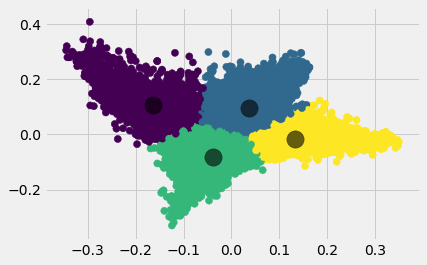

In [203]:
from sklearn.cluster import KMeans
n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
#%time fitted = kmeans.fit(tf_idf_array)
#prediction = kmeans.predict(tf_idf_array)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

In [204]:

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)

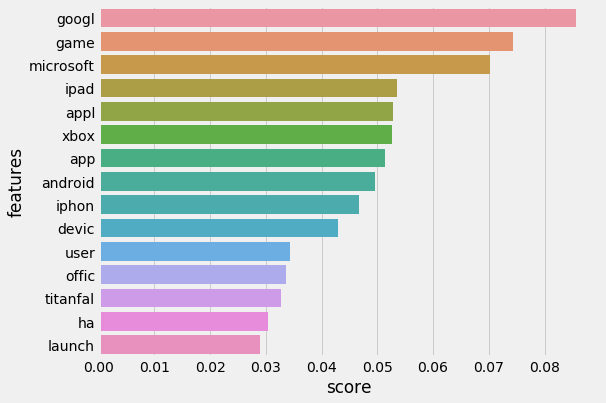

In [205]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])

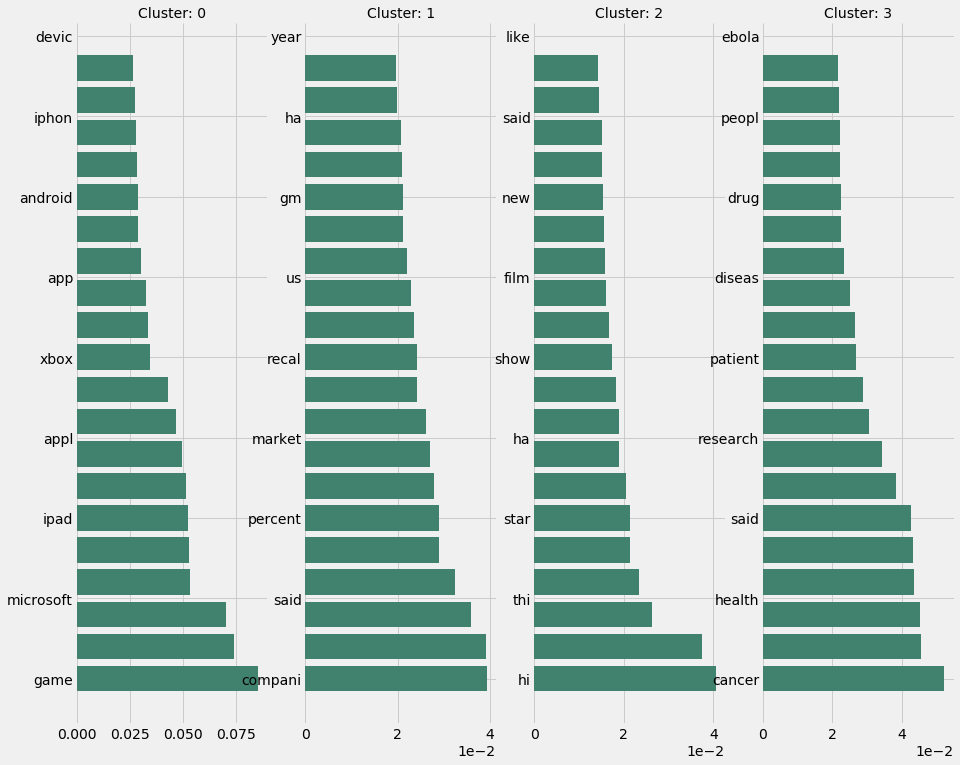

In [206]:
def plot_features(dfs):
    fig = plt.figure(figsize=(14,12))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title("Cluster: "+ str(i), fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#40826d')
        yticks = ax.set_yticklabels(df.features)
    plt.show();
plot_features(dfs)

In [207]:
"""lis = []
for row in prediction:
    if(row == 0):
        lis.append('b')
    elif(row == 1):
        lis.append('t')
    elif(row == 2):
        lis.append('e')
    elif(row == 3):
        lis.append('m')"""

"lis = []\nfor row in prediction:\n    if(row == 0):\n        lis.append('b')\n    elif(row == 1):\n        lis.append('t')\n    elif(row == 2):\n        lis.append('e')\n    elif(row == 3):\n        lis.append('m')"

In [208]:
#df1=pd.DataFrame(lis, columns=['pred'])

In [209]:
#df_final = pd.concat([dataset,df1],axis=1)
#df_final.to_csv('out_final.csv',index = False)
#df_final.head()

In [210]:
lis = []
for row in dataset['Category']:
    if(row == 'm'):
        lis.append(3)
    if(row == 'b'):
        lis.append(1)
    if(row == 'e'):
        lis.append(2)
    if(row == 't'):
        lis.append(0)

In [211]:
from sklearn.metrics import confusion_matrix
confusion_matrix(lis, prediction)

array([[2124, 1011, 1003,  130],
       [ 300, 3371,  519,  538],
       [  31,   69, 5722,   15],
       [   1,  533,  782, 3191]])

In [212]:
from sklearn.metrics import classification_report
report = classification_report(lis, prediction, target_names = ['Medical','Business','Entertainment','Technology'], output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
Medical,0.864821,0.497657,0.631767,4268.000000
Business,0.676364,0.712986,0.694193,4728.000000
Entertainment,0.712933,0.980298,0.825507,5837.000000
Technology,0.823696,0.708010,0.761484,4507.000000
accuracy,0.744984,0.744984,0.744984,0.744984
macro avg,0.769454,0.724738,0.728238,19340.000000
weighted avg,0.763324,0.744984,0.735730,19340.000000
